#  NLP unassessed exercises: This notebook is based on sklearn's tutorial 'Working with Text Data' with some extras and exercises

In [1]:
import sklearn

In [2]:
categories = ['alt.atheism', 'soc.religion.christian',
              'comp.graphics', 'sci.med']

In [3]:
#Loading the 20 Newsgroups dataset
from sklearn.datasets import fetch_20newsgroups
from matplotlib import pyplot as plt

In [4]:
# with a random seed, always keep it the same number each time
# for reproducibility (here 42 (=the meaning of life...))
twenty_train = fetch_20newsgroups(subset='train',categories=categories, 
                                  shuffle=True, random_state=42)

In [5]:
#fetch_20newsgroups puts the data in the .data attribute
len(twenty_train.data)

2257

In [6]:
print(twenty_train.data[0])

From: sd345@city.ac.uk (Michael Collier)
Subject: Converting images to HP LaserJet III?
Nntp-Posting-Host: hampton
Organization: The City University
Lines: 14

Does anyone know of a good way (standard PC application/PD utility) to
convert tif/img/tga files into LaserJet III format.  We would also like to
do the same, converting to HPGL (HP plotter) files.

Please email any response.

Is this the correct group?

Thanks in advance.  Michael.
-- 
Michael Collier (Programmer)                 The Computer Unit,
Email: M.P.Collier@uk.ac.city                The City University,
Tel: 071 477-8000 x3769                      London,
Fax: 071 477-8565                            EC1V 0HB.



In [7]:
# Let's have a look at the first text in the collection
print("\n".join(twenty_train.data[0].split("\n")))

From: sd345@city.ac.uk (Michael Collier)
Subject: Converting images to HP LaserJet III?
Nntp-Posting-Host: hampton
Organization: The City University
Lines: 14

Does anyone know of a good way (standard PC application/PD utility) to
convert tif/img/tga files into LaserJet III format.  We would also like to
do the same, converting to HPGL (HP plotter) files.

Please email any response.

Is this the correct group?

Thanks in advance.  Michael.
-- 
Michael Collier (Programmer)                 The Computer Unit,
Email: M.P.Collier@uk.ac.city                The City University,
Tel: 071 477-8000 x3769                      London,
Fax: 071 477-8565                            EC1V 0HB.



In [8]:
# Extracting features from text data
# Make sure you read the part of the tutorial/lecture about the bags of words
# representation

In [9]:
# A vectorizer is used to extract features from each item in the dataset
from sklearn.feature_extraction.text import CountVectorizer

# create a count vectorizer, which by default does some pre-processing
# tokenize (into single words/unigrams) + lower-casing
# to change these default settings look at the sklearn documentation
count_vect = CountVectorizer(min_df=1)
X_train_counts = count_vect.fit_transform(twenty_train.data)

In [10]:
# let's see how many features we extracted (vocab size) using the CountVectorizer
print (len(count_vect.get_feature_names_out()))

35788


In [11]:
# let's see what is at position 15000 in the global vocab/feature vector
print (count_vect.get_feature_names_out()[15000])

furnace


In [12]:
type(X_train_counts)

scipy.sparse._csr.csr_matrix

In [13]:
# CountVectorizer has extracted all the features for all the docs from the data
# putting them into a matrix of dimensions #instances * #features
X_train_counts.shape

(2257, 35788)

In [14]:
# To see the index of a specific word, you can use the following
count_vect.vocabulary_.get(u'furnace')

15000

In [15]:
# With the index a look at what's in the first row/document (see printout above)
# This should be the bag of words representation for the instance
first_row = X_train_counts[0].toarray()[0]
for i in range(len((list(first_row)))):
    # only look at elements that are non-0
    if first_row[i] >0:
        # print out the index of the feature, the feature name (i.e. the word), count
        print(i, count_vect.get_feature_names_out()[i], first_row[i])

177 071 2
230 0hb 1
587 14 1
2326 477 2
3062 8000 1
3166 8565 1
4017 ac 2
4378 advance 1
4808 also 1
5195 any 1
5201 anyone 1
5285 application 1
8696 city 4
9031 collier 3
9338 computer 1
9801 convert 1
9805 converting 2
9932 correct 1
12014 do 1
12051 does 1
12541 ec1v 1
12833 email 2
14085 fax 1
14281 files 2
14676 format 1
14887 from 1
15576 good 1
15837 group 1
16082 hampton 1
16881 host 1
16916 hp 2
16927 hpgl 1
17302 iii 2
17366 images 1
17389 img 1
17556 in 1
18268 into 1
18474 is 1
19458 know 1
19780 laserjet 2
20198 like 1
20253 lines 1
20459 london 1
21661 michael 3
23122 nntp 1
23610 of 1
23915 organization 1
24651 pc 1
24677 pd 1
25337 please 1
25361 plotter 1
25663 posting 1
26175 programmer 1
27836 response 1
28619 same 1
29022 sd345 1
30623 standard 1
31077 subject 1
31915 tel 1
32116 tga 1
32135 thanks 1
32142 the 5
32270 this 1
32391 tif 1
32493 to 4
33256 uk 2
33572 unit 1
33597 university 2
33915 utility 1
34755 way 1
34775 we 1
35312 would 1
35416 x3769 1


# Naive Bayes

In [16]:
# Training a multinomial (beyond 2 class) NB classifier
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train_counts, twenty_train.target)

In [17]:
twenty_train.target

array([1, 1, 3, ..., 2, 2, 2])

In [18]:
# Testing on a toy dataset
docs_new = ['God is love', 'OpenGL on the GPU is fast']
X_new_counts = count_vect.transform(docs_new)

In [19]:
predicted = clf.predict(X_new_counts)
for doc, category in zip(docs_new, predicted):
    print('%r => %s' % (doc, twenty_train.target_names[category]))

'God is love' => soc.religion.christian
'OpenGL on the GPU is fast' => comp.graphics


In [20]:
# A Pipeline is an object that can carry out count extraction, weighting
# and classification all in one go- be careful you know what each part does
from sklearn.pipeline import Pipeline
text_clf = Pipeline([('vect', CountVectorizer()),
                     ('clf', MultinomialNB()),
                    ])

In [21]:
# Proper testing on the full 20newsgroups test set
import numpy as np
twenty_test = fetch_20newsgroups(subset='test', categories=categories, 
                                 shuffle=True, random_state=42)
docs_test = twenty_test.data
text_clf.fit(twenty_train.data, twenty_train.target)
predicted = text_clf.predict(docs_test)

# Evaluation

In [22]:
# Using the metrics package
from sklearn import metrics

# Get a classification report to see overall and per-class performance 
print(metrics.classification_report(twenty_test.target, predicted,
                                    target_names=twenty_test.target_names))

                        precision    recall  f1-score   support

           alt.atheism       0.92      0.90      0.91       319
         comp.graphics       0.95      0.95      0.95       389
               sci.med       0.96      0.91      0.93       396
soc.religion.christian       0.91      0.97      0.94       398

              accuracy                           0.93      1502
             macro avg       0.93      0.93      0.93      1502
          weighted avg       0.93      0.93      0.93      1502



In [23]:
# Confusion matrix
metrics.confusion_matrix(twenty_test.target, predicted)

array([[288,   4,   3,  24],
       [  8, 370,   8,   3],
       [ 12,  13, 360,  11],
       [  5,   4,   4, 385]])

In [24]:
# a function to make the confusion matrix readable and pretty
def confusion_matrix_heatmap(y_test, preds, labels):
    """Function to plot a confusion matrix"""
    cm = metrics.confusion_matrix(y_test, preds)
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111)
    cax = ax.matshow(cm)
    plt.title('Confusion matrix of the classifier')
    fig.colorbar(cax)
    ax.set_xticks(np.arange(len(labels)))
    ax.set_yticks(np.arange(len(labels)))
    ax.set_xticklabels( labels, rotation=45)
    ax.set_yticklabels( labels)

    for i in range(len(cm)):
        for j in range(len(cm)):
            text = ax.text(j, i, cm[i, j],
                           ha="center", va="center", color="w")

    plt.xlabel('Predicted')
    plt.ylabel('True')
    
    # fix for mpl bug that cuts off top/bottom of seaborn viz:
    b, t = plt.ylim() # discover the values for bottom and top
    b += 0.5 # Add 0.5 to the bottom
    t -= 0.5 # Subtract 0.5 from the top
    plt.ylim(b, t) # update the ylim(bottom, top) values
    plt.show() # ta-da!
    plt.show()

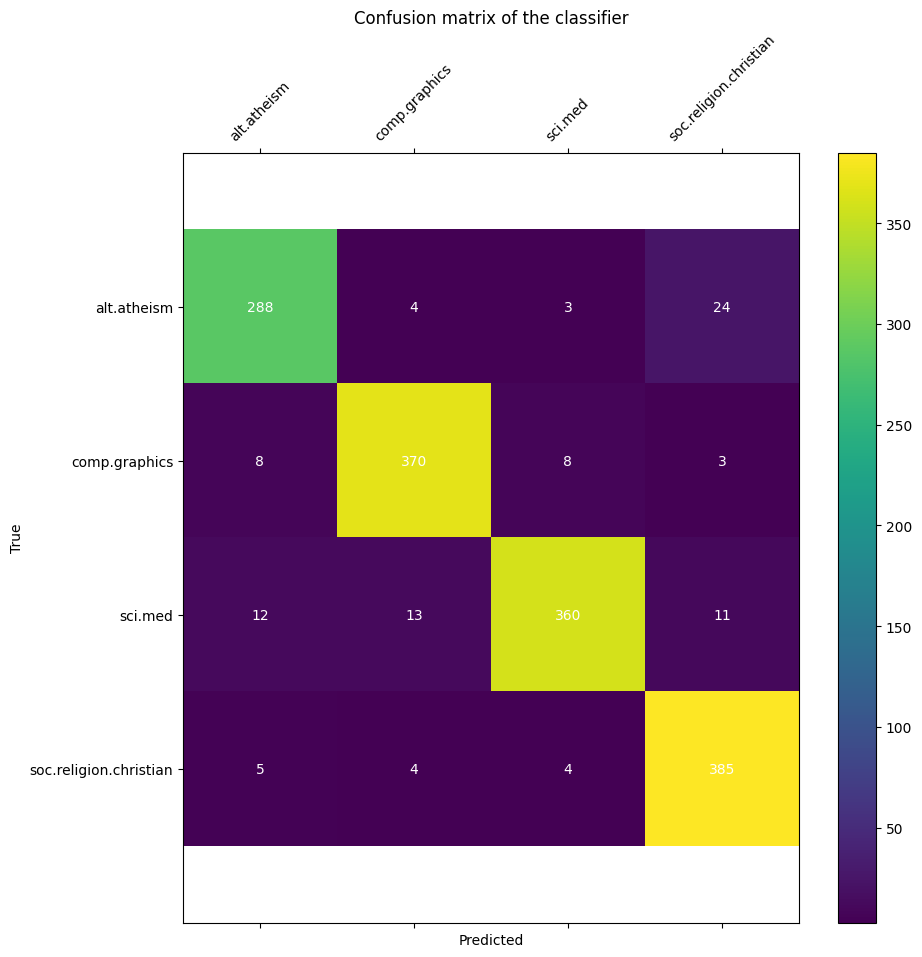

In [25]:
confusion_matrix_heatmap(twenty_test.target, predicted, twenty_test.target_names)

## Interpreting the confusion matrix
A perfect classification of this test set would be all the diagonals having the lightest colour, and everywhere else in the darkest colour (zero confusion/errors). In reality that won't happen with NLP applications worth studying.

Here there are quite a few squares outside the diagonal with moderate numbers. Notice that many alt.atheism documents were classified as soc.religion.christian, hence the lower recall for alt.atheism and lower precision for soc.religion.christian. Quite a few sci-med documents were classified as soc.religion.christian too, again affecting the precision of soc.religion.christian whilst making the recall of sci-med go down a little bit.

In [26]:
# Print out some predictions against the labels
n = 20
for doc, label_idx in zip(docs_test, twenty_test.target):
    label = twenty_test.target_names[label_idx]
    prediction = text_clf.predict([doc])[0]
    print('{0} => {1}, ground truth = {2}'.format(doc, twenty_test.target_names[prediction], label))
    n-=1
    if n <0:
        break
    print('*'*50)
    print()

From: brian@ucsd.edu (Brian Kantor)
Subject: Re: HELP for Kidney Stones ..............
Organization: The Avant-Garde of the Now, Ltd.
Lines: 12
NNTP-Posting-Host: ucsd.edu

As I recall from my bout with kidney stones, there isn't any
medication that can do anything about them except relieve the pain.

Either they pass, or they have to be broken up with sound, or they have
to be extracted surgically.

When I was in, the X-ray tech happened to mention that she'd had kidney
stones and children, and the childbirth hurt less.

Demerol worked, although I nearly got arrested on my way home when I barfed
all over the police car parked just outside the ER.
	- Brian
 => sci.med, ground truth = sci.med
**************************************************

From: rind@enterprise.bih.harvard.edu (David Rind)
Subject: Re: Candida(yeast) Bloom, Fact or Fiction
Organization: Beth Israel Hospital, Harvard Medical School, Boston Mass., USA
Lines: 37
NNTP-Posting-Host: enterprise.bih.harvard.edu

In article

# Exercise 1: Error analysis of False Positives

Performing error analyses is a key part of improving your NLP applications. 

Iterate over the twenty_test.data and, using the list of predictions and labels, print out all the instances where there is a false positive error for that class (i.e. a false positive is where the label is predicted for a given instance, but this is not the corresponding ground truth label). Format the print-out to make it as clear as possible what the correct label and incorrect prediction are for each wrongly classified text. 

HINT: This may be achieved most easily by editing the cell above beginning with the comment `# Print out some predictions against the labels`.

For each example of a given class being predicted as a False Positive, think about which features could be added to reduce the number of these errors and write a summary of the patterns you see for each class wrongly predicted (e.g. when alt.atheism is wrongly predicted). The idea is to try to understand where and why the classifier mistakenly classifies something as a certain class when it is not of that class and try to find out why it is getting confused? Think about trying some ways to get rid of these errors based on extra features (meta-features like document length, different types of pre-processing, feature extraction etc.).

# Exercise 2: Error analysis of False Negatives
Do the same as in Exercise 1 but for False Negatives (note the incorrect predictions will be the same as in Exercise 1, but identifying the classes for which this will be an error will be different). 

For each class for which there are False Negatives, think about which features could be added to reduce the number of these errors.  The idea is to try to understand where and why the classify mistakenly misses something as being of a certain class.